### Objective : Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods. 

<a href="https://ibb.co/6Hz8zvw"><img src="https://i.ibb.co/wSV7VJg/ccpp-plant.jpg" alt="ccpp-plant" border="0"></a><br /><a target='_blank' href='https://statewideinventory.org/bmw-0-60-times'>

 Predicting <strong> full load electrical power output </strong> of a base load power plant is important in order to <strong>maximize the profit</strong> from the available megawatt hours. In order for accurate system analysis <strong>with thermodynamical approaches, a high number of assumptions</strong> is necessary such that these assumptions account for the <strong>unpredictability in the solution</strong>. Without these assumptions, a thermodynamical analysis of a real application compels <strong>thousands of nonlinear equations</strong>, whose solution is either almost impossible or takes too much computational time and effort.

### Thermodynamic Cycle :

<a href="https://ibb.co/dtpWcbm"><img src="https://i.ibb.co/zF2n586/thermo.jpg" alt="thermo" border="0"></a>

  I intend to examine and compare some <strong>machine learning regression</strong> methods to develop a predictive model, which can <strong>predict fully loaded electrical power output of a combined cycle power plant</strong>. The base load operation of a power plant is influenced by four main parameters, which are used as input variables in the dataset, such as ambient temperature, atmospheric pressure, relative humidity, and exhaust steam pressure. These parameters affect electrical power output, which is the target variable. The dataset was <strong>collected over a six-year period</strong> with information stored at an interval of one hour. 

 The data-set has been downloaded from UCI Machine Learning repository [here](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_excel('data.xlsx') #importing the data in a data frame

#### Following abbrevations to be followed throughout the notebook :
                                     AT : Ambient Temperature (in °C)
                                      V : Exhaust Vaccum (in cm of Hg)
                                     AP : Ambient Pressure (in milibar)
                                     RH : Relative Humidity (in %)
                                     PE : Electrical Power Output (in MW) 

In [3]:
data.head() #having a first look at the data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
data.describe() #this helps us understand the statistical parametres related to our data

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


 We observe and understand from mean,25 percentile and 75 percentile values of ambient temperature, vacuum and relative humidity that they can be visualised together while we have to seperately visualize ambient pressure and target electric power output

## Data Visualization

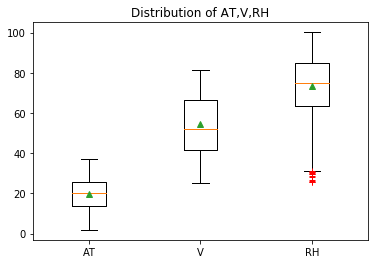

In [5]:
plt.boxplot([data.AT,data.V,data.RH],labels = ['AT','V','RH'],showmeans=True,sym='r+');#box-plot with marker to show mean value and red+ symbol in search of outliers
plt.title('Distribution of AT,V,RH');

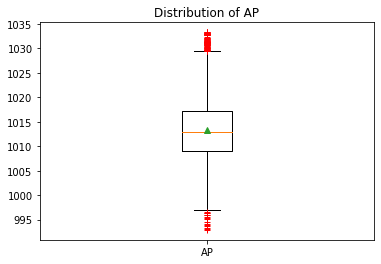

In [6]:
plt.boxplot([data.AP],labels=['AP'],showmeans=True,sym='r+'); #similarly for ambient pressure. 
plt.title('Distribution of AP');

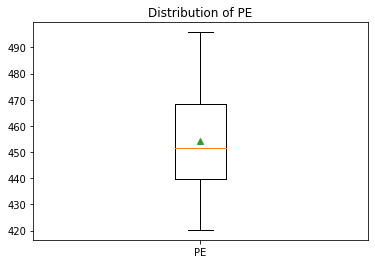

In [7]:
plt.boxplot([data.PE],labels=['PE'],showmeans=True,sym='r+'); #similarly for Power Output
plt.title('Distribution of PE');

 Seeing <strong> outliers </strong> in 'Relative Humidity' and 'Ambient Pressure' tempted me initially to <strong>remove those data points</strong> but in the <strong>boxplot of Electric Power we see no outliers</strong>, thus the outliers observed in above box-plots shouldn't be removed and moreover they are insightful. We realise that these parametres <strong>should not have a significant affect on our target parameter. </strong>

#### We shall now look for co-relations among the parameters of our dataset

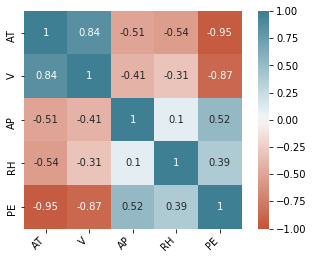

In [8]:
corr = data.corr()                            #setting up the corelation matrix
ax = sns.heatmap(                             #setting up the parametres of the heatmap
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
);
ax.set_xticklabels(                           #setting up the labels
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

 Above heat-map shows corelation among all the parameters,we see that parameters have <strong>no strong corelations relations</strong> among themselves. However, we shall focus more on 'PE'.  As discussed before, Power output is least affected by Relative humidity and Ambient pressure. 

## Power Output vs. Other parameters

 Note that in the plots below : <strong>darker</strong> the color, higher the <strong>density</strong> of datapoints there.

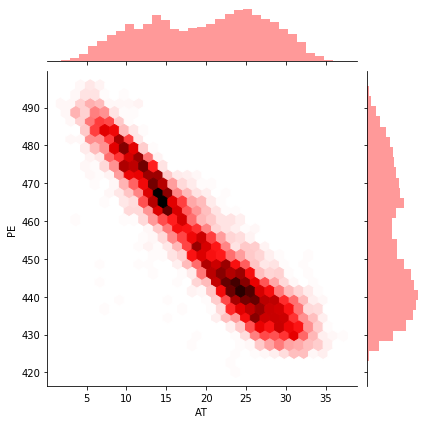

In [9]:
sns.jointplot(x=data.AT,y= data.PE,data = data,kind="hex",color = 'r');


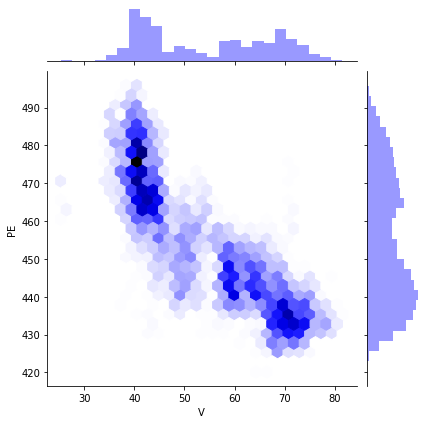

In [10]:
sns.jointplot(x=data.V,y= data.PE,data = data,kind="hex",color = 'b');

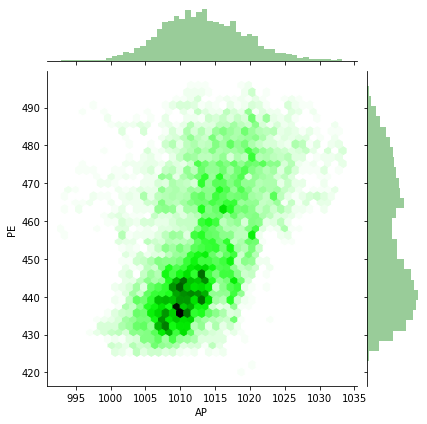

In [11]:
sns.jointplot(x=data.AP,y= data.PE,data = data,kind="hex",color = 'g');

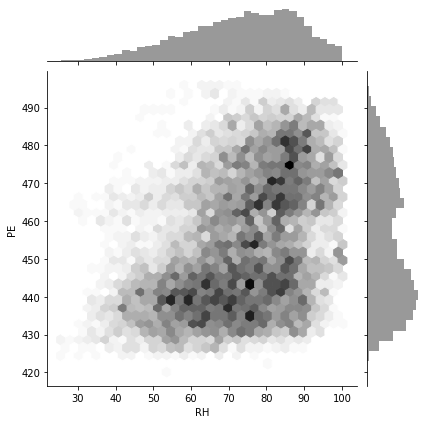

In [12]:
sns.jointplot(x=data.RH,y= data.PE,data = data,kind="hex",color = 'k');

 The graphs shows variation of PE with varying particular parameters.  We observe strong variation of Power Output with Ambient Temperature and Exhaust Vacuum . But the Ambient Pressure and Relative Humidity are more or less <strong>arranged in clusters</strong> and doesn't affect Power Output that much. 

### ML Regression Model


 Now that we've visualized and derived few insights from our data, we shall move onto building our model to predict the power <strong>output for futuristic unknown conditions</strong>.

In [13]:
from sklearn.model_selection import train_test_split  #splitiing the data set into 
X_train,X_test,y_train,y_test = train_test_split(data.drop(['PE'],axis=1),data.PE,test_size =0.33,random_state=42)   

 Since we've spent some good time exploring the data we understand that the parameters have no strong corelations among themselves and thus we shall try a Linear Regression model. 

In [14]:
from sklearn.linear_model import LinearRegression 
linreg = LinearRegression().fit(X_train,y_train) #training the model
y_linreg1 = linreg.predict(X_test)  #predicting the values on our test set
from sklearn.metrics import r2_score #to check the accuracy of our predicted values
from sklearn.metrics import mean_squared_error
rmse_linreg_test = np.sqrt(mean_squared_error(y_test,y_linreg1))
rmse_linreg_train = np.sqrt(mean_squared_error(y_train,linreg.predict(X_train)))
print('RMSE on train set : ',rmse_linreg_train)
print('RMSE on test set: ',rmse_linreg_test)
r2_linreg1_train = r2_score(y_train,linreg.predict(X_train))                            
r2_linreg1_test = r2_score(y_linreg1,y_test)
print('R2 score on train set : ', r2_linreg1_train)                                                        
print('R2 score on test set : ', r2_linreg1_test)  #print the r2 score 

RMSE on train set :  4.532521142326425
RMSE on test set:  4.609438311024231
R2 score on train set :  0.929403558456224
R2 score on test set :  0.9231778854987077


We see an impressive r2_score of our linear regression model. But, since we know that by thermodynamic analysis that the power output is related through non-linear equations so we now try neural network based regression. 

In [15]:
from sklearn.neural_network import MLPRegressor
nnreg = MLPRegressor(random_state = 42, max_iter = 500).fit(X_train,y_train) #training the model
y_nnreg1 = nnreg.predict(X_test) #predicting the values on our test set
rmse_nnreg_test = np.sqrt(mean_squared_error(y_test,y_nnreg1))
rmse_nnreg_train = np.sqrt(mean_squared_error(y_train,linreg.predict(X_train)))
print('RMSE on train set : ',rmse_nnreg_train)
print('RMSE on test set: ',rmse_nnreg_test)
r2_nnreg1_train = r2_score(y_train,nnreg.predict(X_train))                            
r2_nnreg1_test = r2_score(y_linreg1,y_test)
print('R2 score on train set : ', r2_nnreg1_train)                                                        
print('R2 score on test set : ', r2_nnreg1_test)  #print the r2 score 

RMSE on train set :  4.532521142326425
RMSE on test set:  5.029288051047852
R2 score on train set :  0.9123254393919175
R2 score on test set :  0.9231778854987077


 Since we get a better R2 score and RMSE accuracy on our linear regression model, so we finalise our "linreg" as the final model for predicting power output. 

### Results

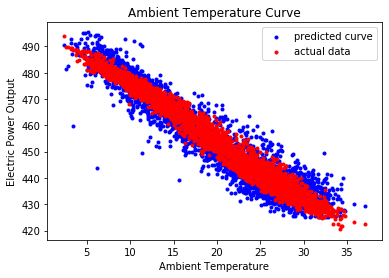

In [16]:
plt.scatter(X_test.AT,y_test,color = 'b',label = "actual data",marker='.');
plt.scatter(X_test.AT,y_linreg1,color = 'r',label = "predicted curve",marker = '.');
plt.title("Ambient Temperature Curve");
plt.legend(["predicted curve","actual data"]);
plt.xlabel("Ambient Temperature");
plt.ylabel("Electric Power Output");

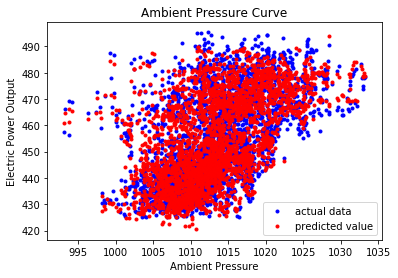

In [17]:
plt.scatter(X_test.AP,y_test,color = 'b',marker ='.');
plt.scatter(X_test.AP,y_linreg1,color = 'r',marker = '.');
plt.title("Ambient Pressure Curve");
plt.legend(["actual data","predicted value"]);
plt.xlabel("Ambient Pressure");
plt.ylabel("Electric Power Output");

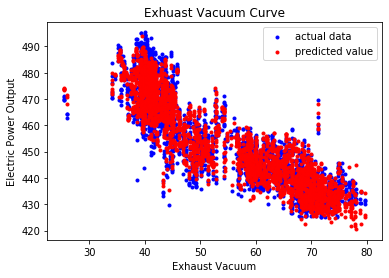

In [18]:
plt.scatter(X_test.V,y_test,color = 'b',marker = '.');
plt.scatter(X_test.V,y_linreg1,color = 'r',marker ='.');
plt.title("Exhuast Vacuum Curve");
plt.legend(["actual data","predicted value"]);
plt.xlabel("Exhaust Vacuum");
plt.ylabel("Electric Power Output");

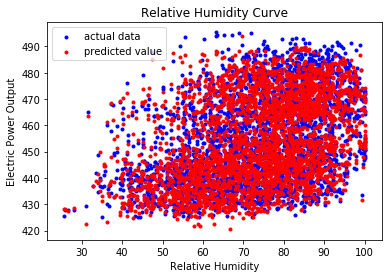

In [19]:
plt.scatter(X_test.RH,y_test,color = 'b',marker ='.');
plt.scatter(X_test.RH,y_linreg1,color = 'r',marker = '.');
plt.title("Relative Humidity Curve");
plt.xlabel("Relative Humidity");
plt.legend(["actual data","predicted value"]);
plt.ylabel("Electric Power Output");

### Conclusion

 We've obtained a quite satisfactory model and we learnt that <strong>Ambient Pressure and Relative Humidity has a very low affect on Electric Power Output </strong>. This study presented an alternative solution model for a prediction of the electrical power output of a base load operated CCPP, when it was fully loaded. Instead of thermodynamical approaches, which involve some assumptions with intractably many nonlinear equations of a real application of a system, machine learning approaches are preferred to use for accurate prediction. The model build has a <strong>high R2_score of 0.923</strong> with a <strong>RMSE value of 4.609 </strong>